## Evaluación del modelo

Describiendo los datos


FuelConsumption.csv,  contiene la clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos livianos nuevos en el mercado Canadiense del año 2014 [Dataset](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** : Año del modelo, todos son del 2014
- **MAKE** : Marca del auto
- **MODEL** : Modelo
- **VEHICLE CLASS**  : Tipo de vehiculo
- **ENGINE SIZE** : Tamaño del motor (total del desplazamiento de todos los cilindros en litros)
- **CYLINDERS** : Número de cilindros
- **TRANSMISSION** : TIpo de transmisión
- **FUEL CONSUMPTION in CITY(L/100 km)** : Consumo de combustible en litros por km en la ciudad.
- **FUEL CONSUMPTION in HWY (L/100 km)** : Consumo de combustible en litros por km en la autopista.
- **FUEL CONSUMPTION COMB (L/100 km)** : Consumo de combustible en litros por km en ciudad  y autopista.
- **CO2 EMISSIONS (g/km)** : Emisiones de CO2 en gramos por kilometro 

Ref English : https://www.nrcan.gc.ca/energy-efficiency/transportation-alternative-fuels/personal-vehicles/choosing-right-vehicle/buying-electric-vehicle/understanding-the-tables/21383

In [259]:
'''
Curso : Análisis de Datos con Python
Fecha : 17/01/2026
'''

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [260]:
df = pd.read_csv('dataset/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [261]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [262]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [263]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [264]:
df.describe(include=[object])

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [265]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


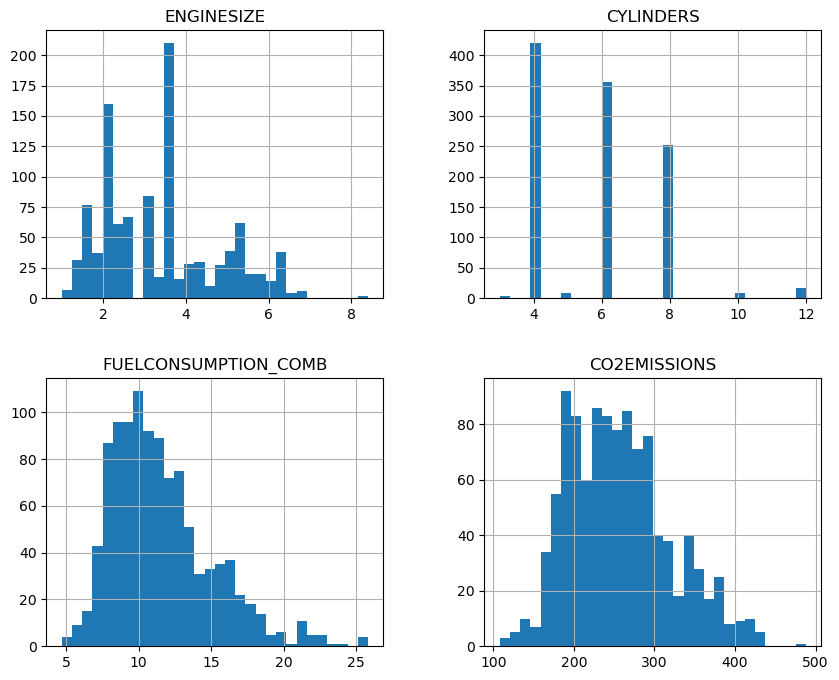

In [266]:
df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']].hist(bins=30, figsize=(10,8))
plt.show()

Generando diagramas de Regresión

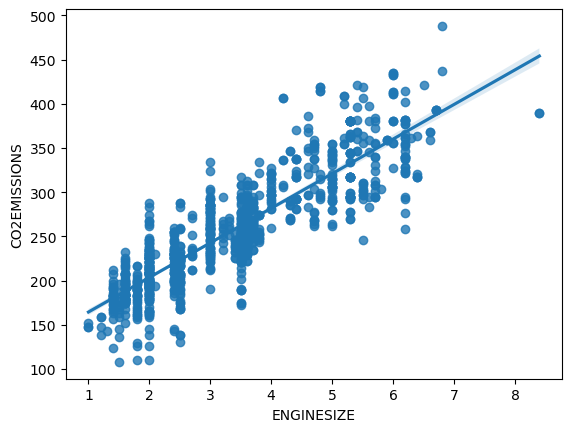

In [267]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=cdf)
plt.show()

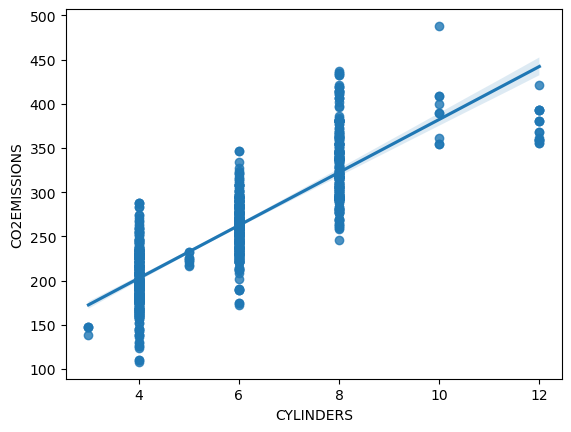

In [268]:
sns.regplot(x="CYLINDERS", y="CO2EMISSIONS", data=cdf)
plt.show()

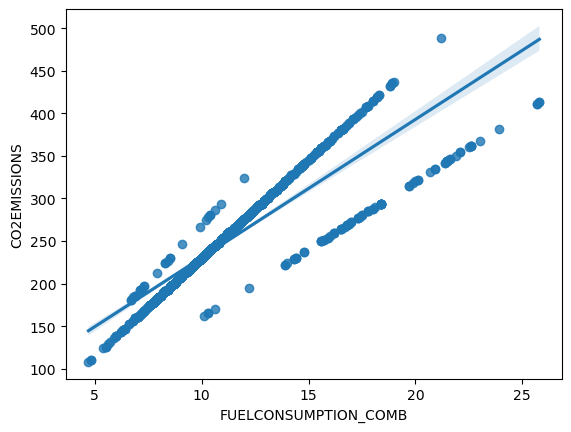

In [269]:
sns.regplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=cdf  )   
plt.show()

# PARTE 1: Modelo de regresión simple una sola variable predictora

### 3. Seleccionando variable independiente y dependiente y separando datos en entrenamiento y prueba


In [270]:
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

print("Tamaño de X:", X.shape)

Tamaño de X: (1067, 1)


In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (853, 1)
Tamaño de X_test: (214, 1)
Tamaño de y_train: (853,)
Tamaño de y_test: (214,)


### 4.- Aplicando regresión simple, mostrando los coeficientes y escribiendo la ecuación


In [272]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train) 

print("Coeficiente:", lm.coef_)
print("Intercepción:", lm.intercept_)

Coeficiente: [38.99297872]
Intercepción: 126.28970217408764


$$ \hat{y} = 126.29 + 38.99x $$

### 4.-Calculando valores predichos, errores, graficando la ecuación y los residuos de los datos de entrenamiento


In [273]:
df_train = pd.concat([X_train, y_train], axis=1)


#### Graficamos el modelo

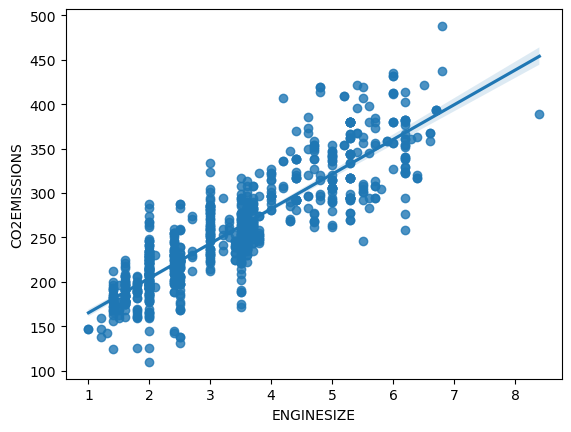

In [274]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df_train, fit_reg=True)
plt.show()

####  Graficamos los residuales

In [275]:
df_train["ERROR"] = y_train - lm.predict(X_train)
df_train["ERROR"].head()

333    -1.879872
106    -5.858809
585    23.731362
55     18.731362
213    47.047511
Name: ERROR, dtype: float64

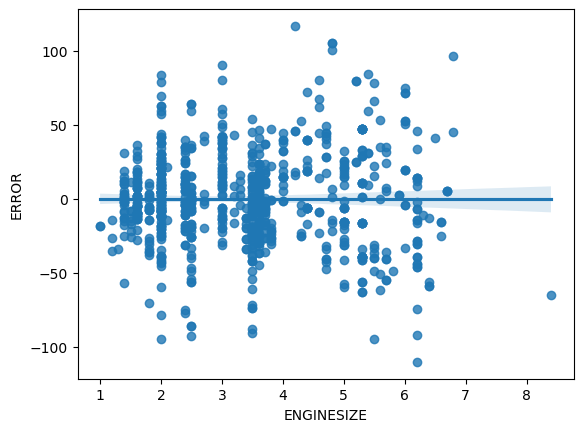

In [276]:
sns.regplot(x="ENGINESIZE", y="ERROR", data=df_train, fit_reg=True)
plt.show()

### 5.- Calculando valores predichos, errores, graficando la ecuación y los residuos de los datos de prueba


In [277]:
df_test = pd.concat([X_test, y_test], axis=1)


#### Graficamos el modelo

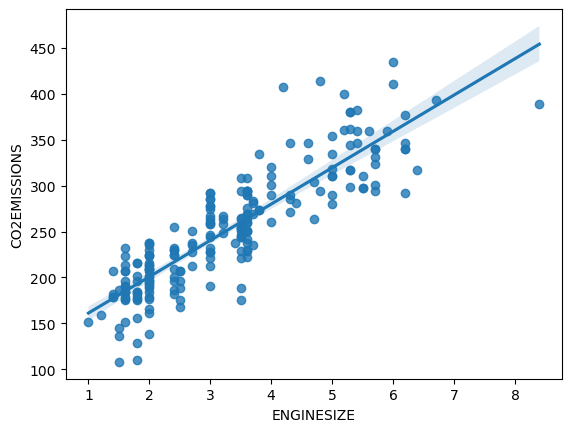

In [278]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df_test, fit_reg=True)
plt.show()

####  Graficamos los residuales

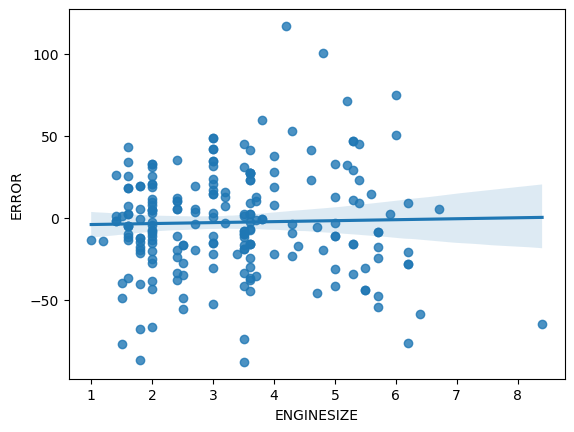

In [279]:
df_test["ERROR"] = y_test - lm.predict(X_test)
sns.regplot(x="ENGINESIZE", y="ERROR", data=df_test, fit_reg=True)
plt.show()

### 6.- Calculando MSE y R2 para modelo de regresion simple en los datos de entrenamiento y prueba


In [280]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_hat = lm.predict(X_train)
print("MAE train:", mean_absolute_error(y_train, y_train_hat))
print("MSE train:", mean_squared_error(y_train, y_train_hat))
print("R2 train:", r2_score(y_train, y_train_hat))

y_test_hat = lm.predict(X_test)
print("MAE test:", mean_absolute_error(y_test, y_test_hat))
print("MSE test:", mean_squared_error(y_test, y_test_hat))
print("R2 test:", r2_score(y_test, y_test_hat))

MAE train: 23.19873782395719
MSE train: 936.7860103082572
R2 train: 0.7644042001810549
MAE test: 24.097257411707844
MSE test: 985.9381692275001
R2 test: 0.7615595731934373


### 7.- Haciendo predicciones y calculando métrica para regresión simple mediante validación cruzada


In [281]:
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

model = LinearRegression()

### **Valización Cruzada**

Es muy útil para validar que el modelo de aprendizaje automático elegido es el correcto y ayuda a evitar el overfitting.


<img src="images/kfold.jpg" width="400"/>


Documentacion 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [282]:
from sklearn.model_selection import cross_val_predict

y_cv_hat = cross_val_predict(model, X, y, cv=5)
y_cv_hat[0:5]

array([201.70277046, 217.41090047, 182.06760795, 260.608258  ,
       260.608258  ])

In [283]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R2 scores for each fold:", scores)
print("Mean R2 score:", scores.mean())


R2 scores for each fold: [0.74334613 0.7838278  0.72801992 0.73032948 0.78636053]
Mean R2 score: 0.7543767707250393


### 8.- Calculando métricas de desempeño para regresión simple mediante validación cruzada


In [284]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=False)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,test_neg_mean_squared_error
0,0.001090,0.000746,0.743346,-880.019764
1,0.000739,0.000599,0.783828,-1055.037158
2,0.000551,0.000511,0.728020,-1075.619670
3,0.000444,0.000427,0.730329,-1023.274235
4,0.000406,0.000399,0.786361,-747.383399


In [285]:
#print("R2 scores for each fold:", list_scores['test_r2'])
#print("Mean R2 score:", list_scores['test_r2'].mean())

MSE_test = -list_scores['test_neg_mean_squared_error']
print("MSE test for each fold:", MSE_test)
print("Mean MSE test:", MSE_test.mean())

R2_test = list_scores['test_r2']
print("R2 test for each fold:", R2_test)
print("Mean R2 test:", R2_test.mean())


MSE test for each fold: [ 880.01976439 1055.03715804 1075.61966982 1023.27423464  747.38339934]
Mean MSE test: 956.2668452461579
R2 test for each fold: [0.74334613 0.7838278  0.72801992 0.73032948 0.78636053]
Mean R2 test: 0.7543767707250393


In [286]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=True)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.000952,0.000746,0.743346,0.764833,-880.019764,-966.430448
1,0.000642,0.000526,0.783828,0.757121,-1055.037158,-919.550324
2,0.000458,0.000441,0.728020,0.772190,-1075.619670,-914.742235
3,0.000407,0.000426,0.730329,0.769227,-1023.274235,-928.436812
4,0.000397,0.000423,0.786361,0.756613,-747.383399,-996.858715


In [287]:
MSE_train = -list_scores['train_neg_mean_squared_error']
print("MSE train for each fold:", MSE_train)
print("Mean MSE train:", MSE_train.mean())

R2_train = list_scores['train_r2']
print("R2 train for each fold:", R2_train)
print("Mean R2 train:", R2_train.mean())

MSE train for each fold: [966.43044831 919.5503243  914.74223494 928.43681233 996.85871542]
Mean MSE train: 945.2037070617034
R2 train for each fold: [0.76483329 0.75712109 0.77218984 0.76922695 0.75661337]
Mean R2 train: 0.763996907116833


### 9.- Coeficientes para regresión simple mediante validación cruzada


In [288]:
from sklearn.model_selection import cross_validate

estimators = cross_validate(model, X, y, cv=5, return_estimator=True)

df_estimators = pd.DataFrame(estimators)
df_estimators.head()

,fit_time,score_time,estimator,test_score
0,0.001136,0.000382,LinearRegression(),0.743346
1,0.000843,0.000396,LinearRegression(),0.783828
2,0.000611,0.000381,LinearRegression(),0.728020
3,0.000424,0.000303,LinearRegression(),0.730329
4,0.000398,0.000291,LinearRegression(),0.786361


In [289]:
for i, est in enumerate(estimators['estimator']):
    print(f"Estimator {i} coefficients: {est.coef_}, intercept: {est.intercept_}")

Estimator 0 coefficients: [39.27032503], intercept: 123.16212040430028
Estimator 1 coefficients: [38.77237039], intercept: 126.8853840622669
Estimator 2 coefficients: [39.51513913], intercept: 123.51055848424673
Estimator 3 coefficients: [39.17922779], intercept: 126.14743687399331
Estimator 4 coefficients: [38.80652617], intercept: 127.10513637542542


### 10.- Creando función para gráfico de distribución


In [290]:
def distribution_plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(6, 6))
    sns.kdeplot(RedFunction, color="red", label=RedName)
    sns.kdeplot(BlueFunction, color="blue", label=BlueName)
    plt.title(Title)
    plt.xlabel('Emisión de CO2')
    plt.ylabel('Tamaño del motor del auto')
    plt.legend()
    plt.show()

### 11.- Realizando gráficos de predicciones para datos de entrenamiento y prueba


In [291]:
from sklearn.linear_model import LinearRegression

# Entrenamiento del modelo
lm = LinearRegression()
lm.fit(X_train, y_train) 

# Valores calculados
y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)


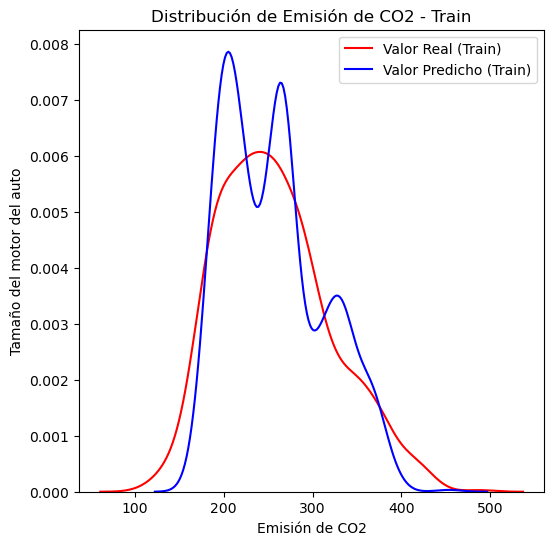

In [292]:
# Distribución de los valores reales vs valores predichos - Train data
distribution_plot(y_train, y_train_hat, "Valor Real (Train)", "Valor Predicho (Train)", "Distribución de Emisión de CO2 - Train")   

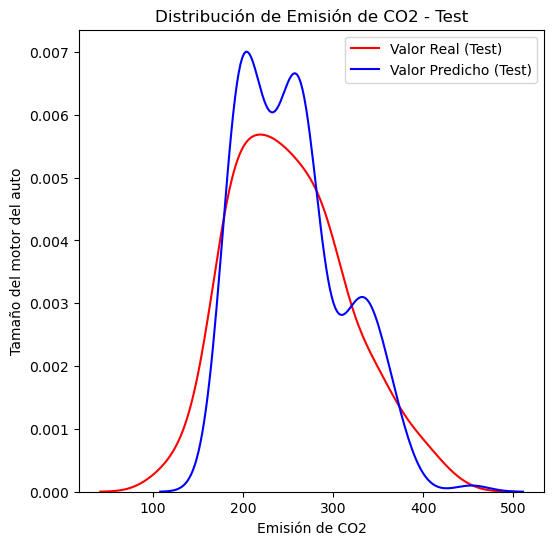

In [293]:
# Distribución de los valores reales vs valores predichos - Test data
distribution_plot(y_test, y_test_hat, "Valor Real (Test)", "Valor Predicho (Test)", "Distribución de Emisión de CO2 - Test")   

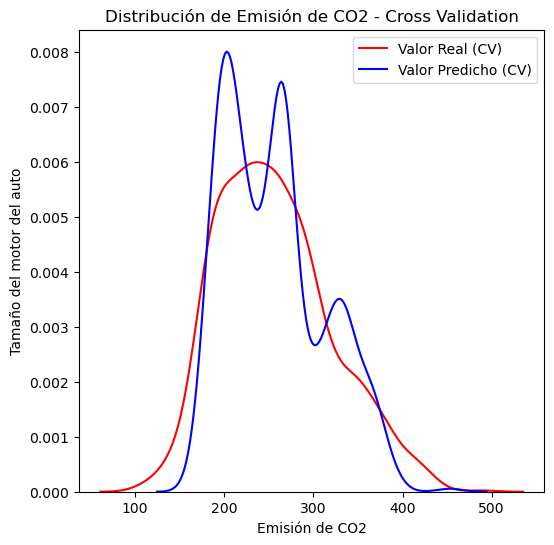

In [294]:
# Distribución de los valores reales vs valores predichos - Cross Validation data
distribution_plot(y, y_cv_hat, "Valor Real (CV)", "Valor Predicho (CV)", "Distribución de Emisión de CO2 - Cross Validation")

# PARTE 2: Modelo de regresión con varias variables predictora

In [296]:
X = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = cdf['CO2EMISSIONS']

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (853, 3)
Tamaño de X_test: (214, 3)
Tamaño de y_train: (853,)
Tamaño de y_test: (214,)


In [302]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train) 

print("Coeficiente:", lm.coef_)
print("Intercepción:", lm.intercept_)

Coeficiente: [11.2094395   7.15561381  9.5208118 ]
Intercepción: 67.34838518362108


$$ \hat{y} = 67.35 + 11.21x_{1} + 7.16x_{2} + 9.52x_{3} $$

In [307]:
df_train = pd.concat([X_train, y_train], axis=1)
y_train_hat = lm.predict(X_train)
residuales = y_train - y_train_hat
residuales.head()

333    -6.926388
106    -2.829139
585    28.833577
55      9.552359
213    38.903280
Name: CO2EMISSIONS, dtype: float64

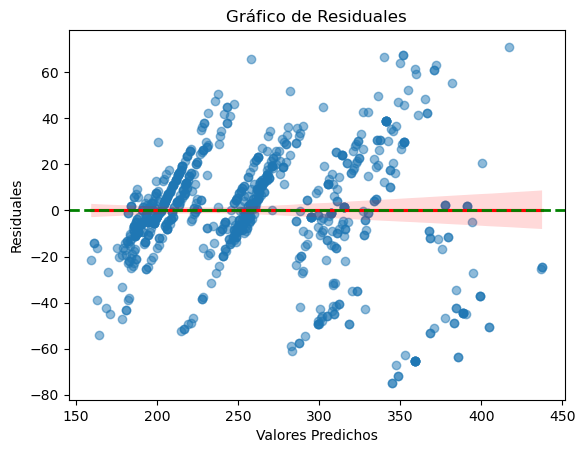

In [312]:

sns.regplot(x=y_train_hat, y=residuales, 
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'})
plt.axhline(y=0, color='green', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.show()